

3. Escriba una clase con las siguientes funcionalidades:
    3.1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
    3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables.
    3.3 Implemente un método que entregue los nombre de las variables disponibles.
    3.3 Implemente un método que reciba el nombre de una variable disponible dentro del objeto ( en el  dataframe) y regrese: sus estadísticas básicas:  media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.



Variables disponibles:
['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Estadísticas básicas:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Análisis de la variable 'sepal.length':


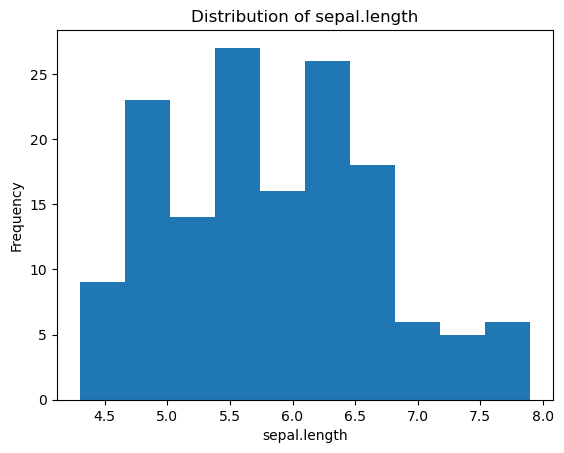

{'mean': 5.843333333333334, 'median': 5.8, 'std': 0.8280661279778629, 'q25': 5.1, 'q50': 5.8, 'q75': 6.4}


In [6]:

import pandas as pd
import matplotlib.pyplot as plt

class DataAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.variables = None
    
    def read_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            self.variables = list(self.df.columns)
            return True
        except FileNotFoundError:
            print(f"Error: File '{self.file_path}' not found.")
            return False
    
    def calculate_basic_stats(self):
        if self.df is not None:
            return self.df.describe()
        else:
            return None
    
    def get_variables(self):
        return self.variables
    
    def analyze_variable(self, variable_name):
        if self.df is not None and variable_name in self.variables:
            variable_data = self.df[variable_name]
            stats = {
                "mean": variable_data.mean(),
                "median": variable_data.median(),
                "std": variable_data.std(),
                "q25": variable_data.quantile(0.25),
                "q50": variable_data.quantile(0.5),
                "q75": variable_data.quantile(0.75)
            }
            plt.hist(variable_data)
            plt.title(f"Distribution of {variable_name}")
            plt.xlabel(variable_name)
            plt.ylabel("Frequency")
            plt.show()
            return stats
        else:
            return None
        
        
    
analyzer = DataAnalyzer("iris.csv")
analyzer.read_data()

# Obtener la lista de variables disponibles
print("\nVariables disponibles:")
print(analyzer.get_variables())

# Calcular las estadísticas básicas para todas las variables
print("\nEstadísticas básicas:")
print(analyzer.calculate_basic_stats())

# Analizar la variable "sepal.length"
print("\nAnálisis de la variable 'sepal.length':")
print(analyzer.analyze_variable("sepal.length"))
